# Разведочный анализ данных. Исследование и визуализация данных.

## Текстовое описание набора данных
<p>В качестве набора данных был использован набор данных выпустившихся из университета студентов.
    <a>https://www.kaggle.com/datasets/erqizhou/students-data-analysis</a></p>
<p>Датасет состоит из файла Students data.csv</p>
<p>Далее следует дать пояснение для некоторых столбцов датасета:</p>
<ul>
    <li>from1 - локация студента (определяется буквой; чем дальше - тем ближе к концу алфавита буква)</li>
    <li>from2 - показатель предрасположенности студента к математике(A - есть, B - отсутствует)</li>
    <li>from3 - каким способом студент поступил в университет</li>
    <li>from4 - уровень жизни студента (0 - небольшие доходы; 4 - студент из богатой семьи и пр.)</li>
    <li>y - успех студента (0 - без аспирантуры, 1 - успех внутри страны, 2 - успех заграницей)</li>
</ul>

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

In [3]:
dataset = pd.read_csv('datasets/Students data.csv')

## Основные характеристики датасета

In [4]:
print("Всего строк в датасете: ", dataset.shape[0])
print("Всего столбцов в датасете: ", dataset.shape[1])
print("Типы столбцов датасета:")
dataset.dtypes

Всего строк в датасете:  105
Всего столбцов в датасете:  17
Типы столбцов датасета:


ID                       int64
class                   object
gender                  object
race                     int64
GPA                    float64
Algebra                  int64
Calculus1                int64
Calculus2                int64
Statistics               int64
Probability              int64
Measure                  int64
Functional_analysis      int64
from1                   object
from2                   object
from3                   object
from4                    int64
y                        int64
dtype: object

In [4]:
dataset.head

<bound method NDFrame.head of        ID class  gender  race    GPA  Algebra  Calculus1  Calculus2  \
0    1141     A    male     1  73.47       64         81         87   
1    1142     A  female     1  71.22       57         50         51   
2    1143     A  female     2  74.56       47         48         71   
3    1144     A  female     1  72.89       46         72         38   
4    1145     A  female     1  70.11       49         45         63   
..    ...   ...     ...   ...    ...      ...        ...        ...   
100  1241     A  female     1  88.34       87         83         92   
101  1242     B    male     1  89.84       98         77         95   
102  1243     B    male     1  88.82       83         80         91   
103  1244     A    male     1  86.60       92         82         91   
104  1245     A    male     1  93.71       93         97         99   

     Statistics  Probability  Measure  Functional_analysis from1 from2 from3  \
0            60           74       71

Улучшим представление датасета. Уберём столбцы "from1" и "from3" (так как оба варианта используют в качестве меры внутреннюю систему университета), а также переименуем "from2" в "Preference on mathematics", "from4" в "Family background", "y" в "Success"  и уберём из некоторых названий столбцов пробелы, чтобы визуализация данных выглядела нагляднее.

In [5]:
dataset = dataset.drop(columns=["from1", "from3"], axis=1)

In [6]:
dataset.rename(columns={"from2":"Preference on mathematics", "from4": "Family background", "y": "Success", "Functional_analysis":"Functional analysis"}, inplace=True)

Также заменим значения столбца "Success" на строковые также для наглядности при визуализации

In [7]:
dataset.loc[dataset["Success"] == 0, "Success"] = "Fail"
dataset.loc[dataset["Success"] == 1, "Success"] = "Success, inland"
dataset.loc[dataset["Success"] == 2, "Success"] = "Success, abroad"

In [8]:
dataset.head(5)

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional analysis,Preference on mathematics,Family background,Success
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,3,Fail
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,A,2,Fail
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,A,0,"Success, inland"
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,A,0,Fail
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,A,0,Fail


Выведем, сколько для каждого столбца датасета есть нулевых значений

In [9]:
for column in dataset.columns:
    print(column, "-", dataset[dataset[column].isnull()].shape[0])

ID - 0
class - 0
gender - 0
race - 0
GPA - 0
Algebra - 0
Calculus1 - 0
Calculus2 - 0
Statistics - 0
Probability - 0
Measure - 0
Functional analysis - 0
Preference on mathematics - 0
Family background - 0
Success - 0


Далее выведем для каждого столбца различные подсчитанные значения

In [10]:
dataset.describe()

,ID,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional analysis,Family background
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,1193.000000,1.790476,82.957048,76.057143,71.961905,78.942857,85.133333,83.876190,80.761905,75.323810,0.504762
std,30.454885,1.673867,6.053187,11.722618,12.197039,14.997326,10.269509,10.514363,10.296119,13.003324,0.889293
min,1141.000000,1.000000,63.490000,46.000000,38.000000,17.000000,51.000000,29.000000,54.000000,9.000000,0.000000
25%,1167.000000,1.000000,79.340000,67.000000,64.000000,71.000000,80.000000,79.000000,74.000000,67.000000,0.000000
50%,1193.000000,1.000000,84.110000,76.000000,73.000000,83.000000,87.000000,85.000000,81.000000,76.000000,0.000000
75%,1219.000000,1.000000,87.300000,84.000000,80.000000,91.000000,92.000000,92.000000,89.000000,85.000000,0.000000
max,1245.000000,7.000000,93.710000,98.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,3.000000


In [11]:
print("Уникальные значения Preference on mathematics: ", sorted(dataset["Preference on mathematics"].unique()))
print("Уникальные значения Family background: ", sorted(dataset["Family background"].unique()))
print("Уникальные значения Success: ", sorted(dataset["Success"].unique()))

Уникальные значения Preference on mathematics:  ['A', 'B']
Уникальные значения Family background:  [0, 2, 3]
Уникальные значения Success:  ['Fail', 'Success, abroad', 'Success, inland']


## Визуальное исследование датасета

### Диаграмма рассеяния

<Axes: xlabel='GPA', ylabel='Algebra'>

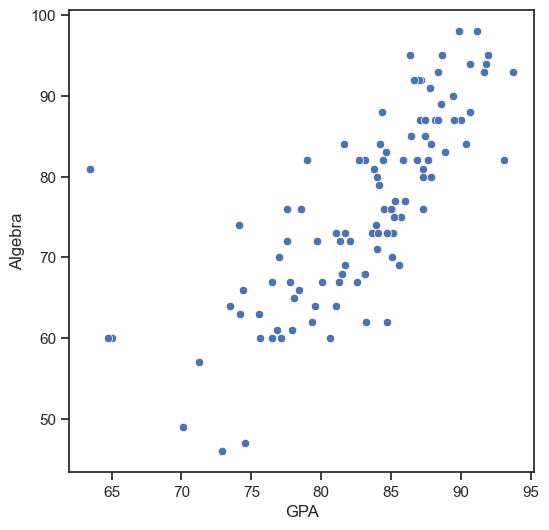

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x="GPA", y="Algebra", data=dataset)

<Axes: xlabel='GPA', ylabel='Algebra'>

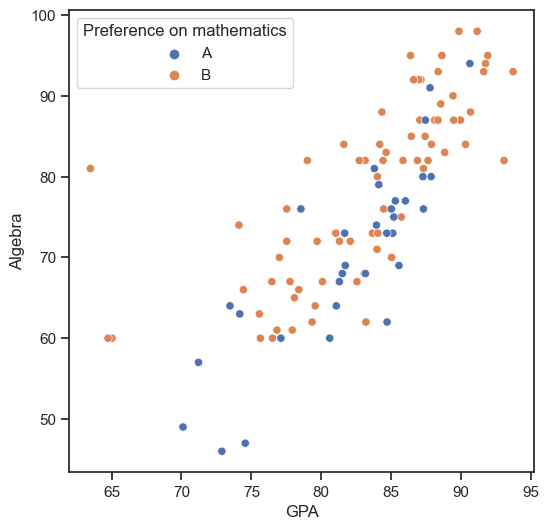

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x="GPA", y="Algebra", data=dataset, hue="Preference on mathematics")

### Гистограмма

C:\Users\Tanya\AppData\Local\Temp\ipykernel_10180\1204940822.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GPA'])


<Axes: xlabel='GPA', ylabel='Density'>

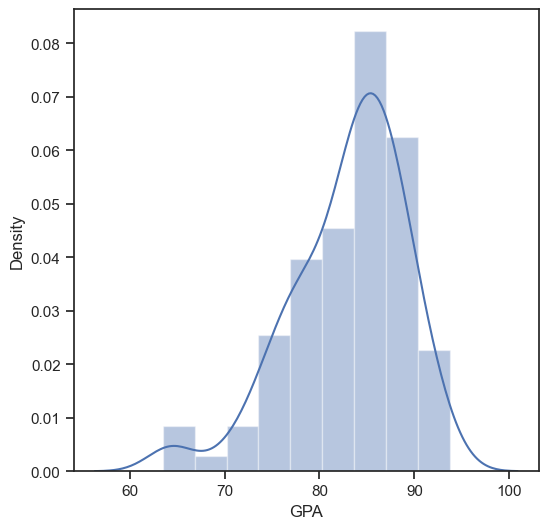

In [14]:
fig, ax = plt.subplots(figsize=(6,6)) 
sns.distplot(dataset['GPA'])

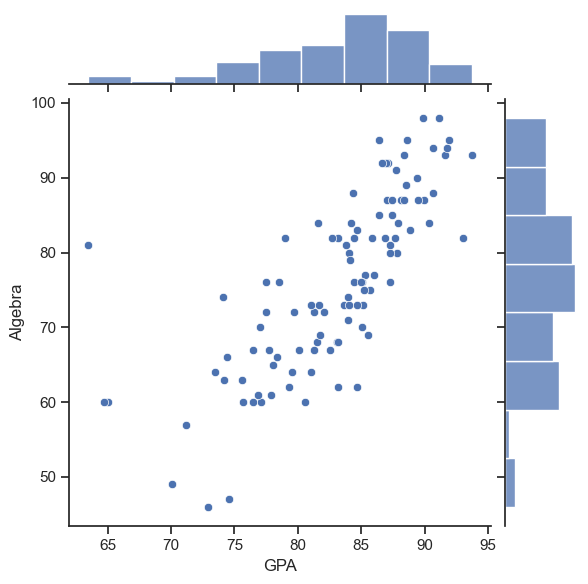

In [15]:
sns.jointplot(x='GPA', y='Algebra', data=dataset)

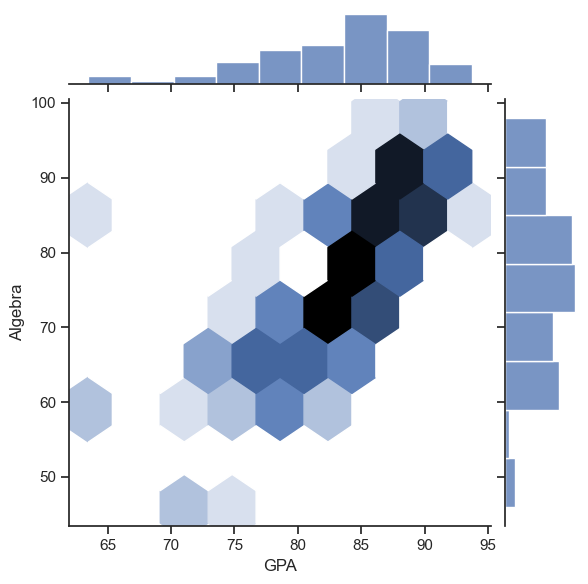

In [16]:
sns.jointplot(x='GPA', y='Algebra', data=dataset, kind="hex")

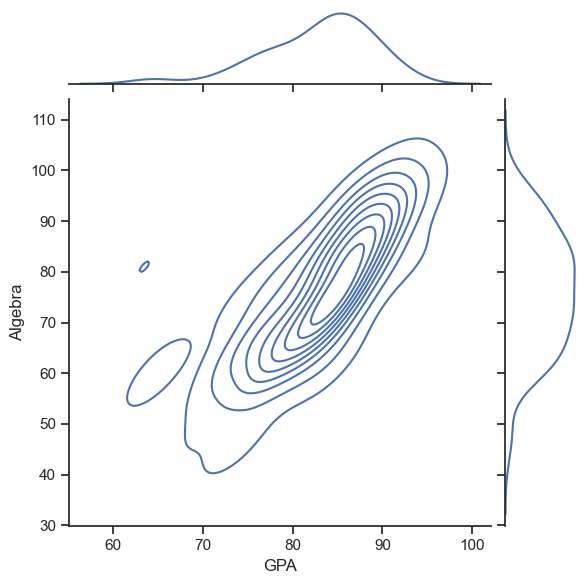

In [17]:
sns.jointplot(x='GPA', y='Algebra', data=dataset, kind="kde")

### Парные диаграммы

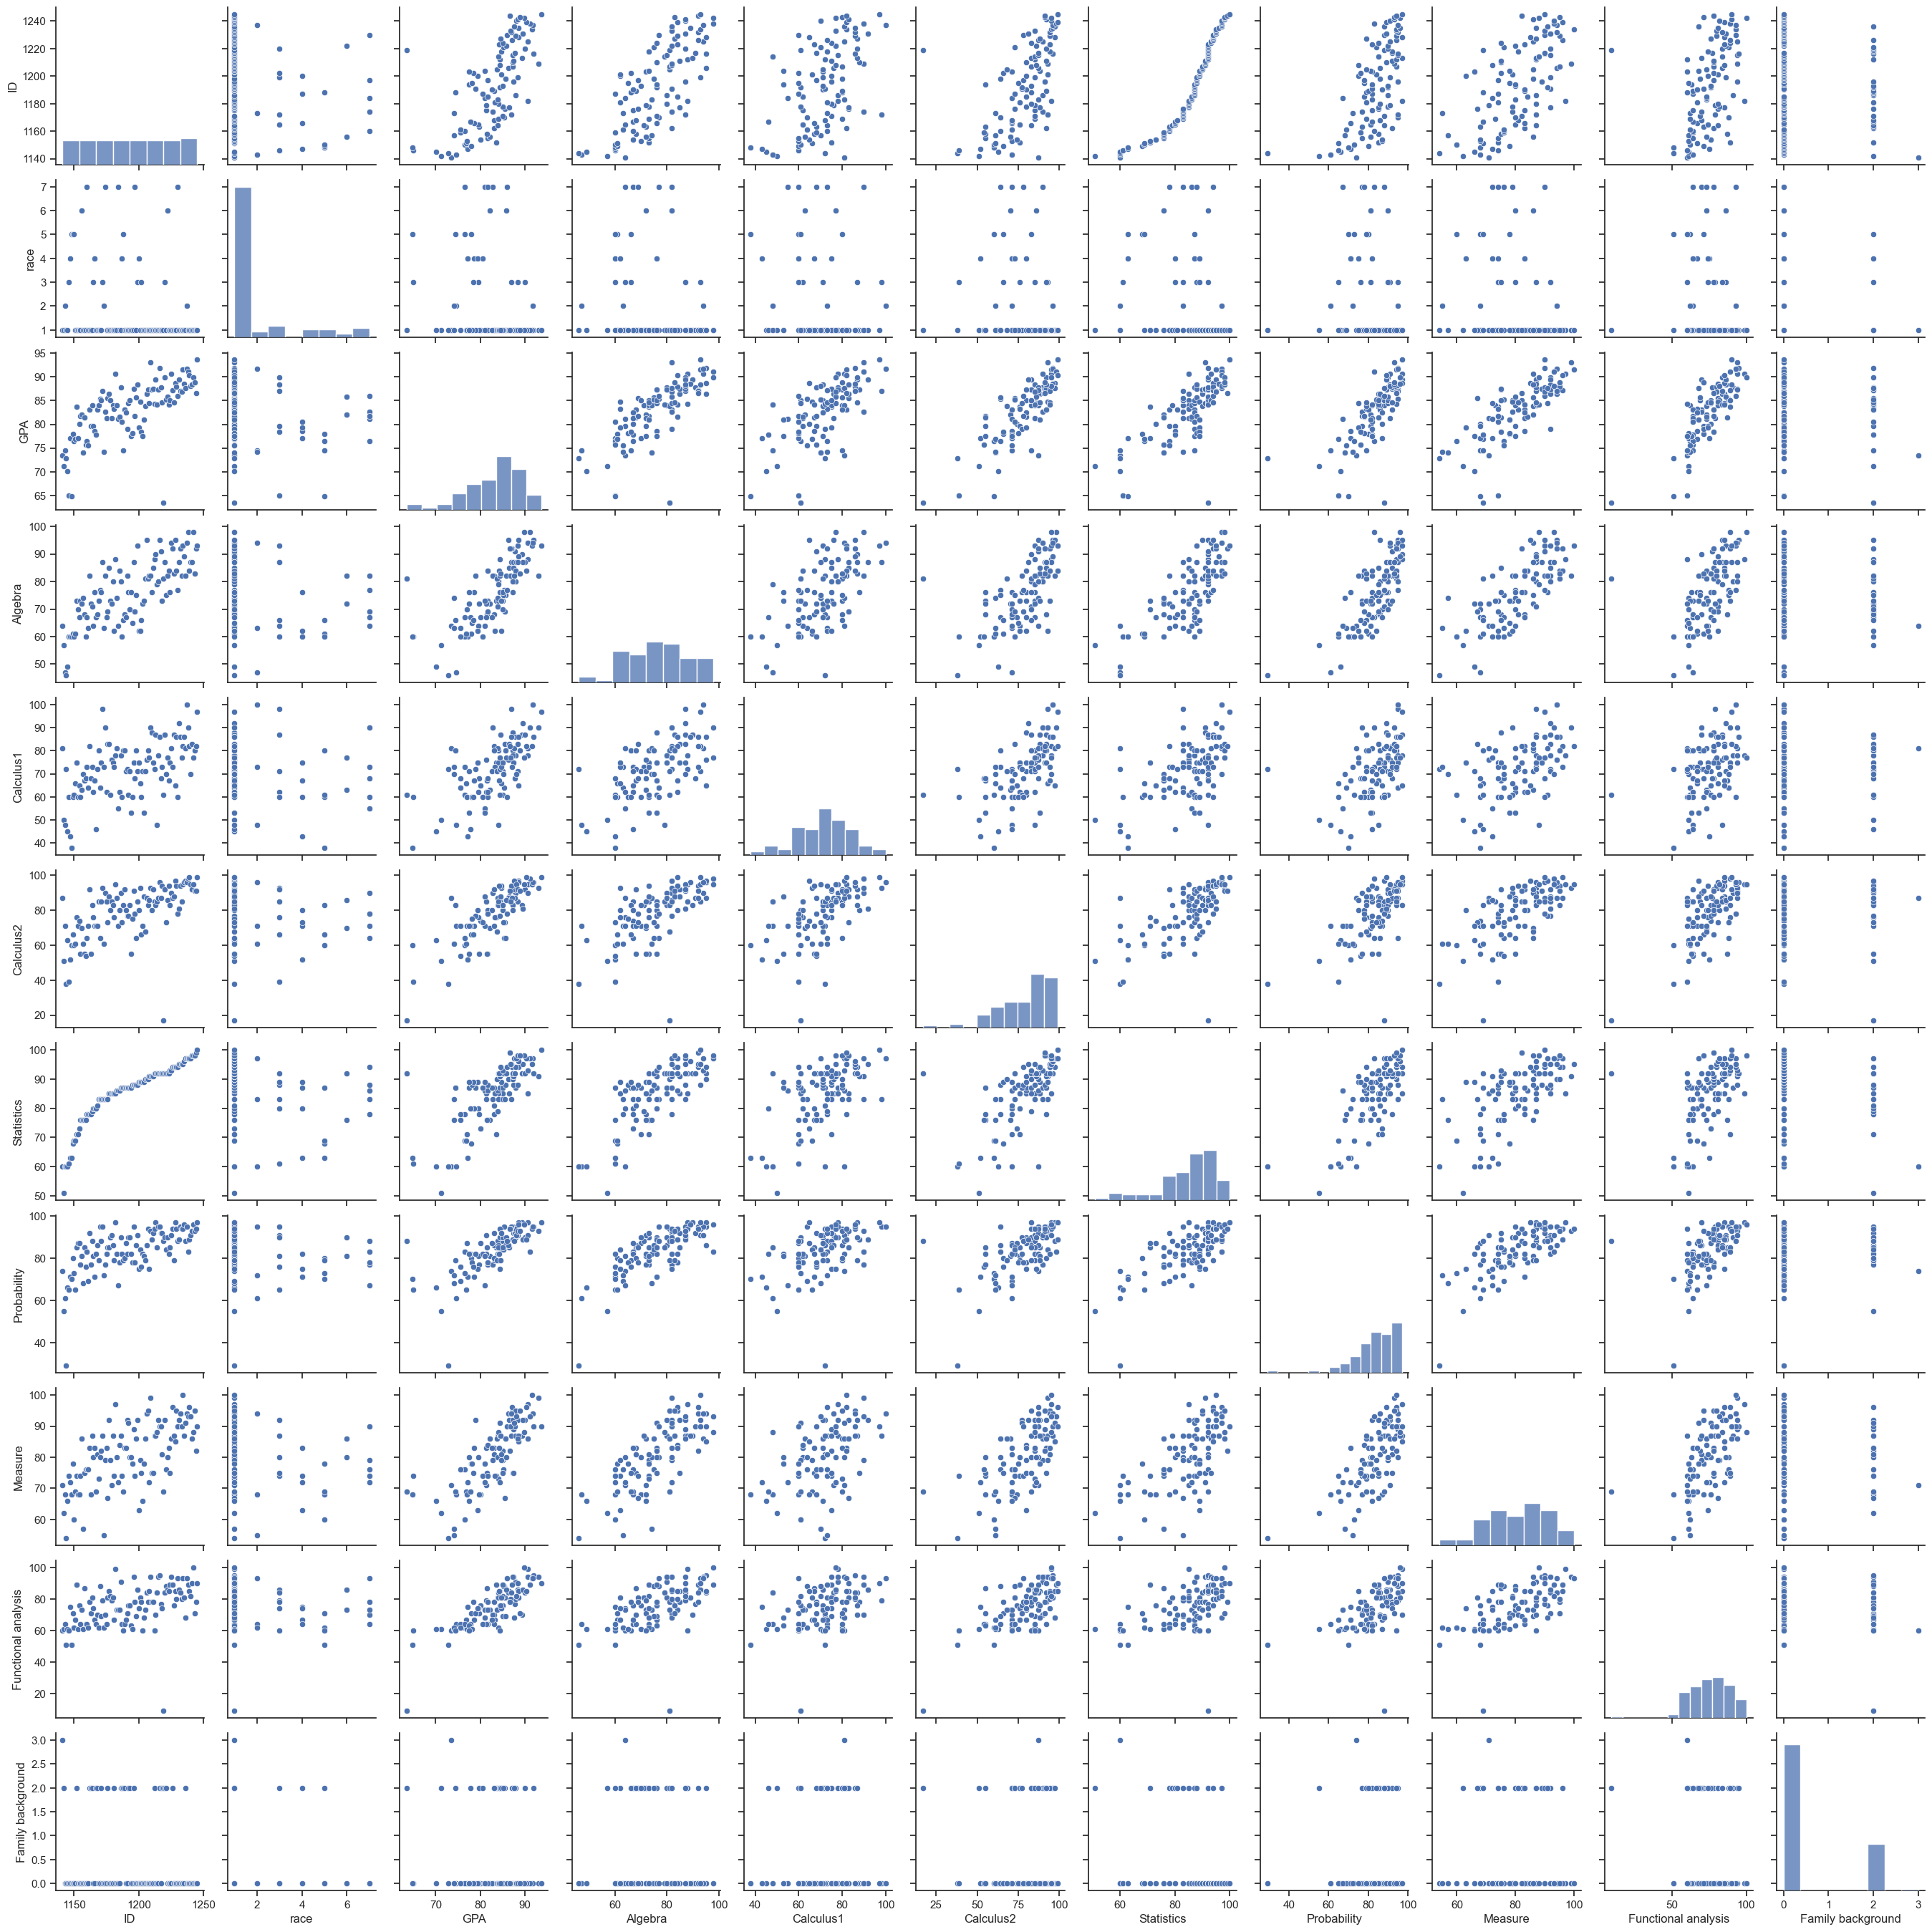

In [20]:
sns.pairplot(dataset)

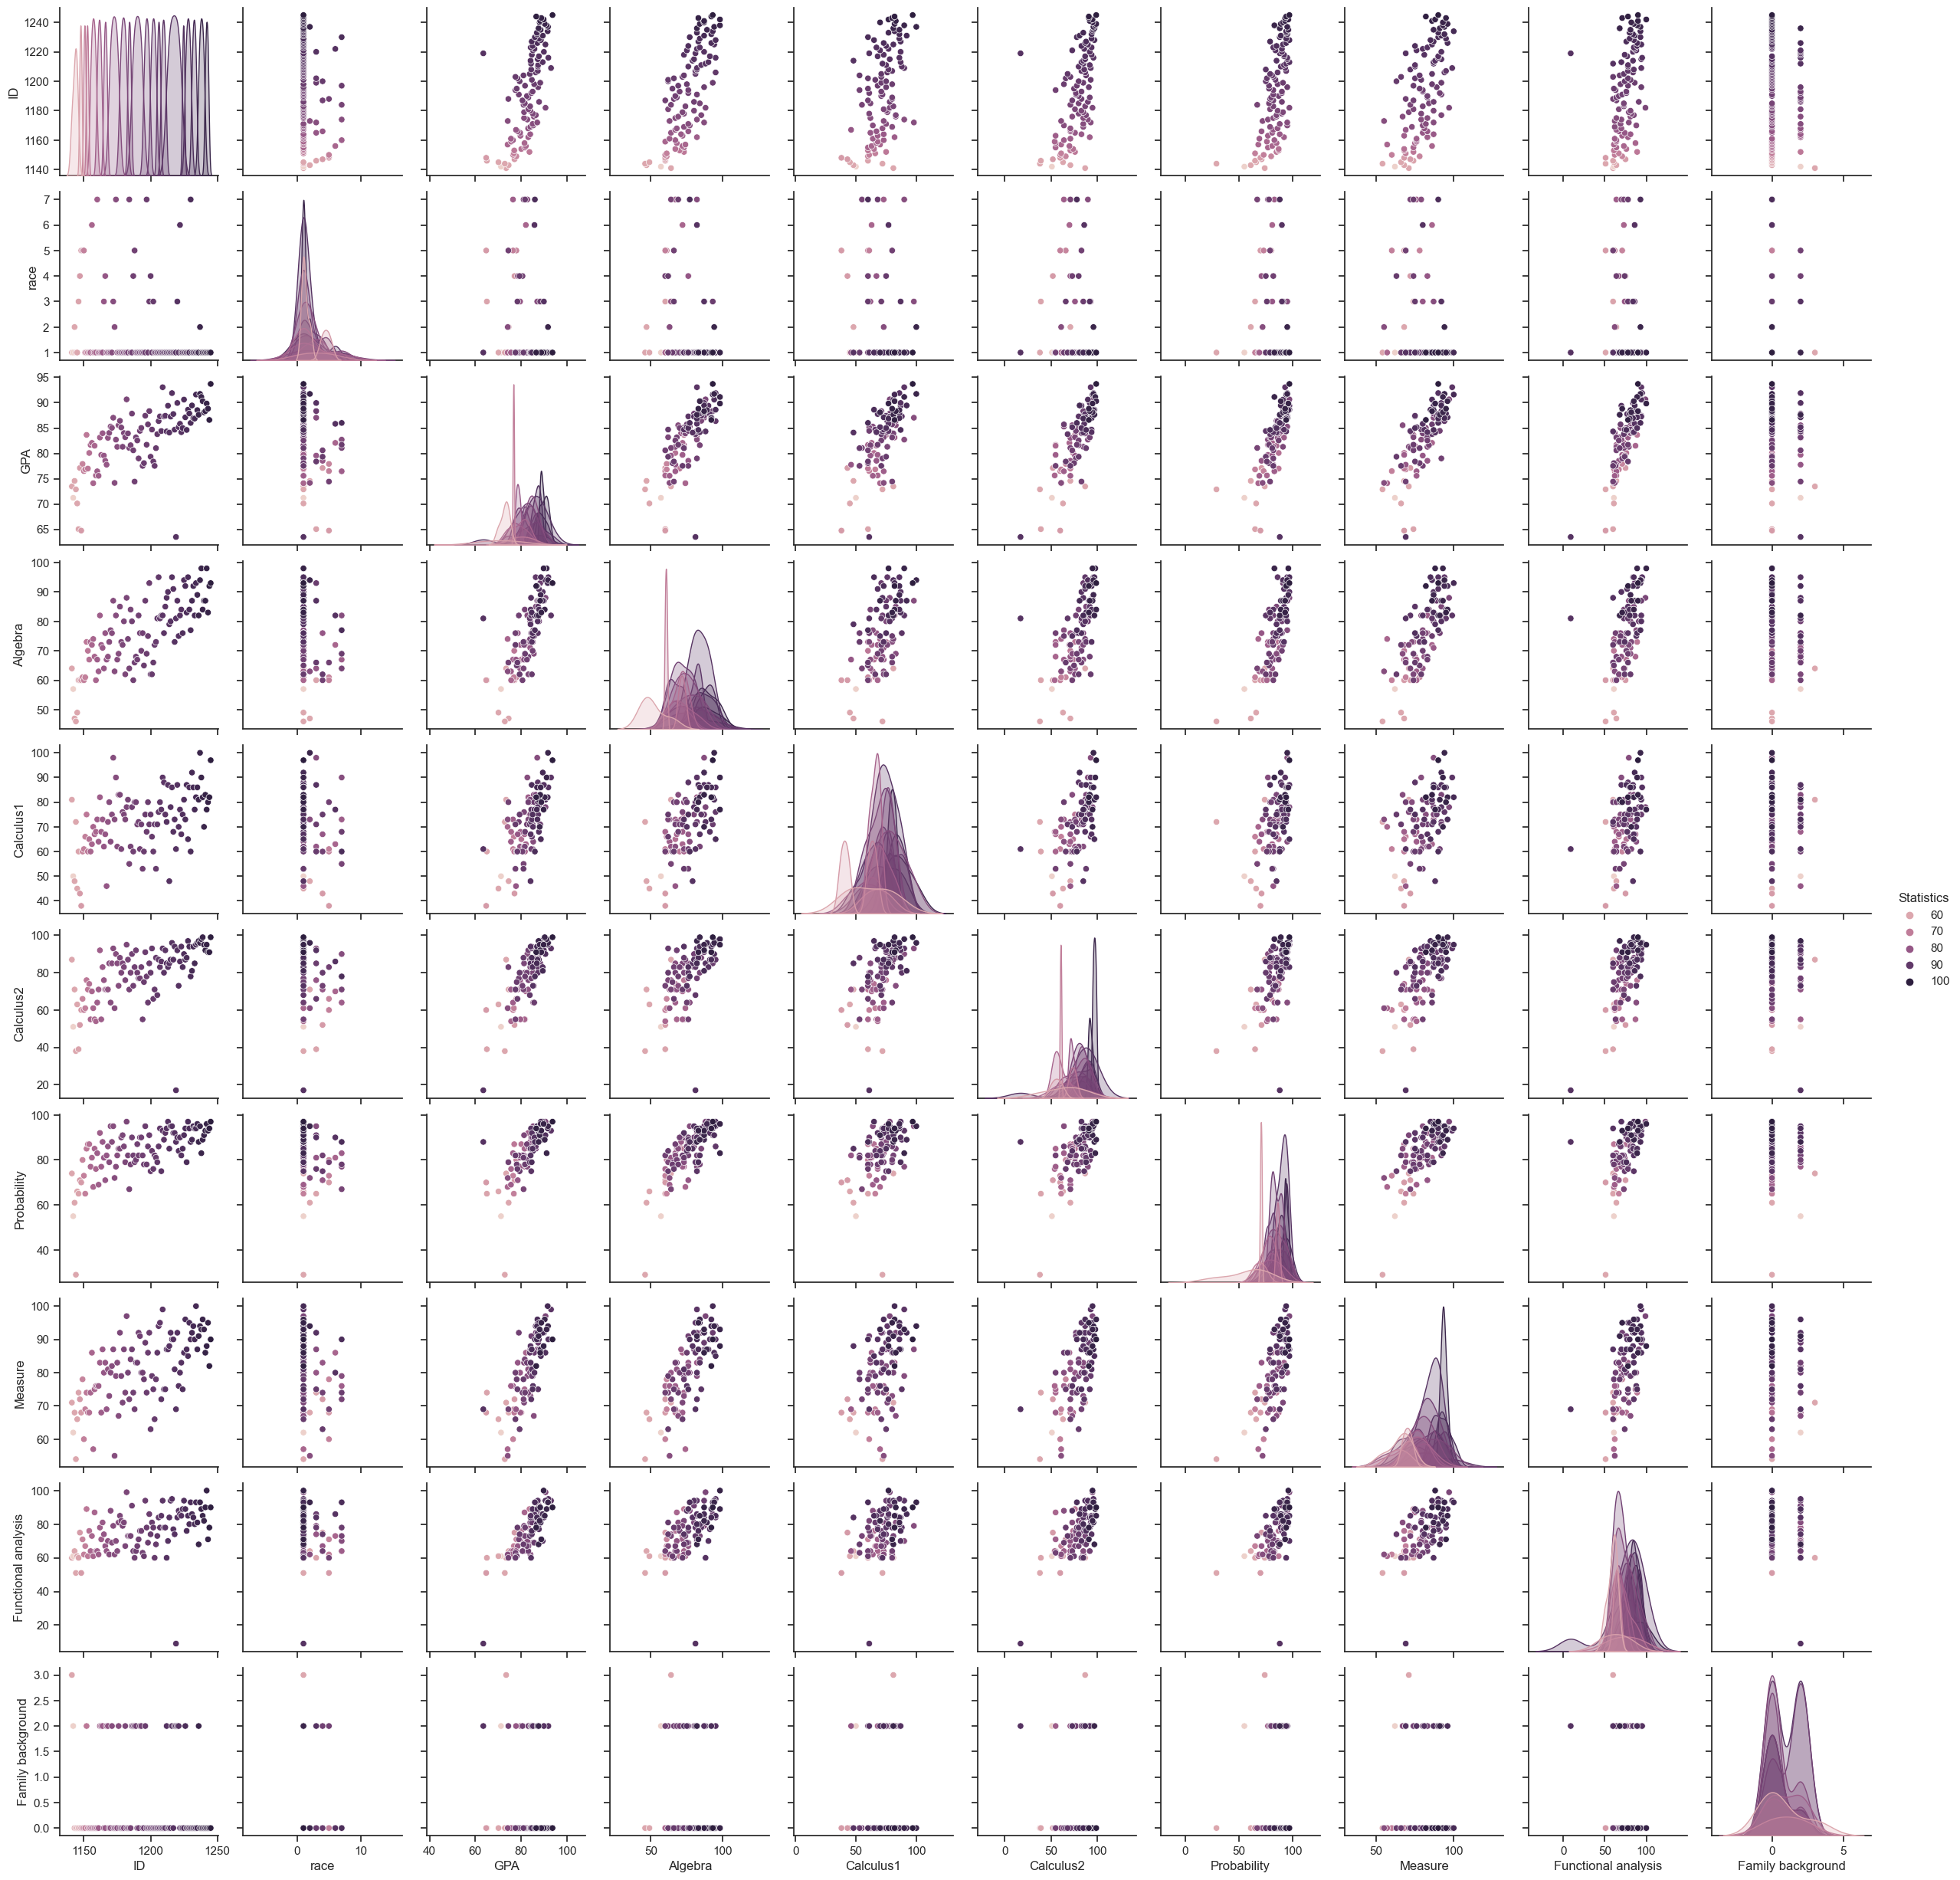

In [21]:
sns.pairplot(dataset, hue="Statistics")

### Ящик с усами

<Axes: xlabel='GPA'>

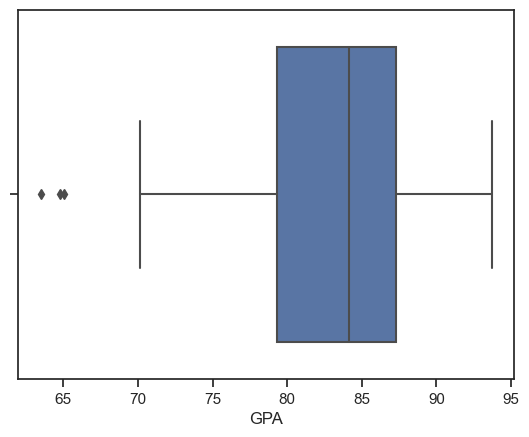

In [24]:
sns.boxplot(x=dataset['GPA'])

<Axes: ylabel='GPA'>

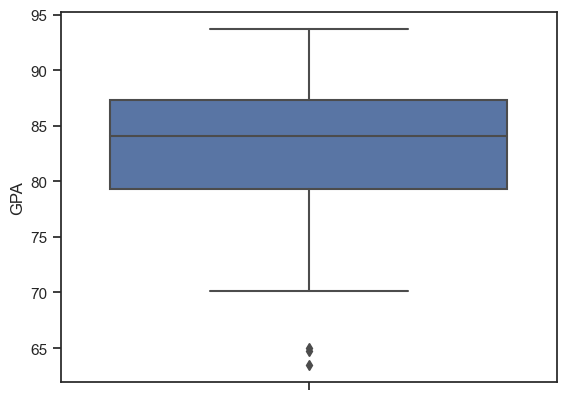

In [25]:
sns.boxplot(y=dataset['GPA'])

<Axes: xlabel='Preference on mathematics', ylabel='GPA'>

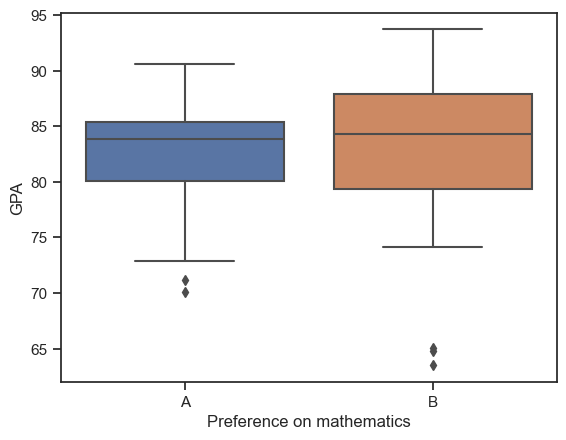

In [26]:
sns.boxplot(x='Preference on mathematics', y='GPA', data=dataset)

<Axes: xlabel='GPA'>

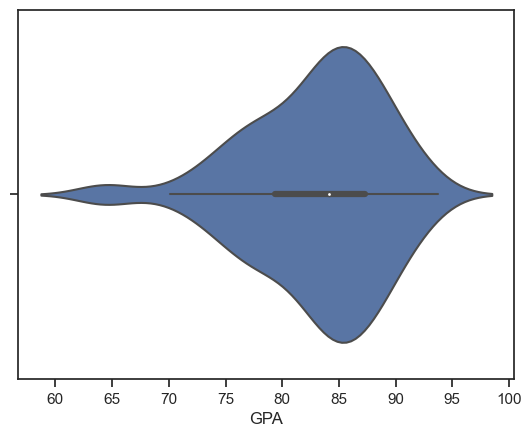

In [27]:
sns.violinplot(x=dataset['GPA'])

C:\Users\Tanya\AppData\Local\Temp\ipykernel_10180\2135113488.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GPA'], ax=ax[1])


<Axes: xlabel='GPA', ylabel='Density'>

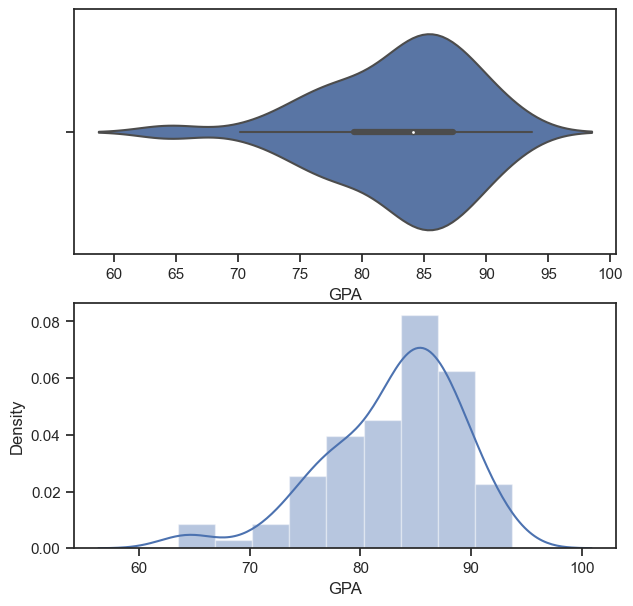

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(7,7))
sns.violinplot(ax=ax[0], x=dataset['GPA'])
sns.distplot(dataset['GPA'], ax=ax[1])

<Axes: xlabel='Preference on mathematics', ylabel='GPA'>

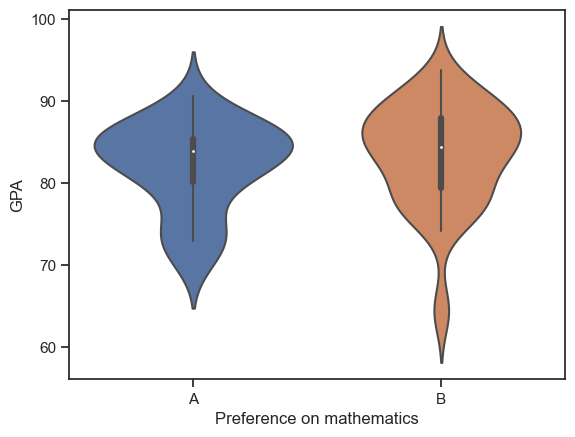

In [29]:
sns.violinplot(x='Preference on mathematics', y='GPA', data=dataset)

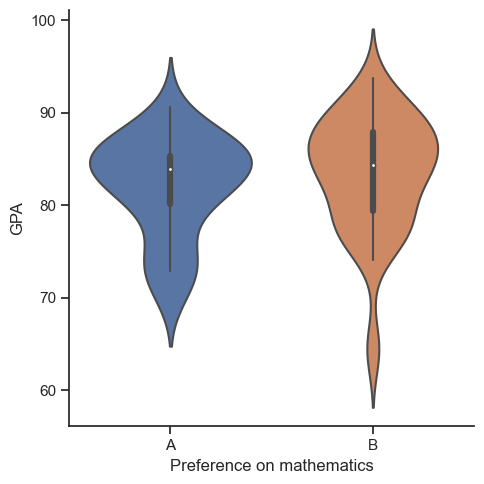

In [31]:
sns.catplot(y='GPA', x='Preference on mathematics', data=dataset, kind="violin", split=True)

## Информация о корреляции признаков

In [50]:
corr_dataset = dataset.drop(columns=["Preference on mathematics", "class", "gender", "Calculus1", "Calculus2"], axis=1)

In [61]:
corr_dataset.loc[corr_dataset["Success"] == "Fail", "Success"] = 0.0
corr_dataset.loc[corr_dataset["Success"] == "Success, inland", "Success"] = 1.0
corr_dataset.loc[corr_dataset["Success"] == "Success, abroad", "Success"] = 2.0
corr_dataset["Success"] = corr_dataset["Success"].astype("int64")

In [62]:
corr_dataset.head(5)

,ID,race,GPA,Algebra,Statistics,Probability,Measure,Functional analysis,Family background,Success
0,1141,1,73.47,64,60,74,71,60,3,0
1,1142,1,71.22,57,51,55,62,61,2,0
2,1143,2,74.56,47,60,61,68,64,0,1
3,1144,1,72.89,46,60,29,54,51,0,0
4,1145,1,70.11,49,60,66,66,61,0,0


In [63]:
corr_dataset.dtypes

ID                       int64
race                     int64
GPA                    float64
Algebra                  int64
Statistics               int64
Probability              int64
Measure                  int64
Functional analysis      int64
Family background        int64
Success                  int64
dtype: object

In [64]:
corr_dataset.corr()

,ID,race,GPA,Algebra,Statistics,Probability,Measure,Functional analysis,Family background,Success
ID,1.000000,-0.199560,0.688738,0.751647,0.925148,0.627886,0.635982,0.464508,-0.112189,0.319634
race,-0.199560,1.000000,-0.246571,-0.249298,-0.179594,-0.229312,-0.186478,-0.102435,-0.154352,0.011883
GPA,0.688738,-0.246571,1.000000,0.761590,0.740903,0.732898,0.758676,0.809451,-0.052361,0.292536
Algebra,0.751647,-0.249298,0.761590,1.000000,0.759595,0.752480,0.755499,0.572575,-0.078426,0.257051
Statistics,0.925148,-0.179594,0.740903,0.759595,1.000000,0.716918,0.644505,0.469362,-0.092722,0.296005
Probability,0.627886,-0.229312,0.732898,0.752480,0.716918,1.000000,0.704155,0.547730,0.074619,0.245288
Measure,0.635982,-0.186478,0.758676,0.755499,0.644505,0.704155,1.000000,0.596535,-0.066559,0.229720
Functional analysis,0.464508,-0.102435,0.809451,0.572575,0.469362,0.547730,0.596535,1.000000,-0.138165,0.254932
Family background,-0.112189,-0.154352,-0.052361,-0.078426,-0.092722,0.074619,-0.066559,-0.138165,1.000000,-0.311258
Success,0.319634,0.011883,0.292536,0.257051,0.296005,0.245288,0.229720,0.254932,-0.311258,1.000000


In [65]:
corr_dataset.corr(method='pearson')

,ID,race,GPA,Algebra,Statistics,Probability,Measure,Functional analysis,Family background,Success
ID,1.000000,-0.199560,0.688738,0.751647,0.925148,0.627886,0.635982,0.464508,-0.112189,0.319634
race,-0.199560,1.000000,-0.246571,-0.249298,-0.179594,-0.229312,-0.186478,-0.102435,-0.154352,0.011883
GPA,0.688738,-0.246571,1.000000,0.761590,0.740903,0.732898,0.758676,0.809451,-0.052361,0.292536
Algebra,0.751647,-0.249298,0.761590,1.000000,0.759595,0.752480,0.755499,0.572575,-0.078426,0.257051
Statistics,0.925148,-0.179594,0.740903,0.759595,1.000000,0.716918,0.644505,0.469362,-0.092722,0.296005
Probability,0.627886,-0.229312,0.732898,0.752480,0.716918,1.000000,0.704155,0.547730,0.074619,0.245288
Measure,0.635982,-0.186478,0.758676,0.755499,0.644505,0.704155,1.000000,0.596535,-0.066559,0.229720
Functional analysis,0.464508,-0.102435,0.809451,0.572575,0.469362,0.547730,0.596535,1.000000,-0.138165,0.254932
Family background,-0.112189,-0.154352,-0.052361,-0.078426,-0.092722,0.074619,-0.066559,-0.138165,1.000000,-0.311258
Success,0.319634,0.011883,0.292536,0.257051,0.296005,0.245288,0.229720,0.254932,-0.311258,1.000000


In [66]:
corr_dataset.corr(method='kendall')

,ID,race,GPA,Algebra,Statistics,Probability,Measure,Functional analysis,Family background,Success
ID,1.000000,-0.180039,0.560176,0.563498,0.977869,0.466663,0.467656,0.403242,-0.085778,0.267196
race,-0.180039,1.000000,-0.216608,-0.228067,-0.184932,-0.254188,-0.171897,-0.123307,-0.150347,-0.009219
GPA,0.560176,-0.216608,1.000000,0.651252,0.575443,0.628101,0.602764,0.618456,-0.032952,0.250935
Algebra,0.563498,-0.228067,0.651252,1.000000,0.574512,0.587948,0.571537,0.483604,-0.079434,0.215844
Statistics,0.977869,-0.184932,0.575443,0.574512,1.000000,0.481417,0.477867,0.409170,-0.084348,0.275758
Probability,0.466663,-0.254188,0.628101,0.587948,0.481417,1.000000,0.509682,0.473699,0.052468,0.219626
Measure,0.467656,-0.171897,0.602764,0.571537,0.477867,0.509682,1.000000,0.447905,-0.062679,0.203634
Functional analysis,0.403242,-0.123307,0.618456,0.483604,0.409170,0.473699,0.447905,1.000000,-0.078033,0.218257
Family background,-0.085778,-0.150347,-0.032952,-0.079434,-0.084348,0.052468,-0.062679,-0.078033,1.000000,-0.282005
Success,0.267196,-0.009219,0.250935,0.215844,0.275758,0.219626,0.203634,0.218257,-0.282005,1.000000


In [67]:
corr_dataset.corr(method='spearman')

,ID,race,GPA,Algebra,Statistics,Probability,Measure,Functional analysis,Family background,Success
ID,1.000000,-0.234389,0.755778,0.750342,0.998197,0.638880,0.646288,0.559742,-0.104395,0.336785
race,-0.234389,1.000000,-0.287494,-0.299333,-0.235258,-0.329095,-0.219357,-0.152042,-0.158151,-0.008709
GPA,0.755778,-0.287494,1.000000,0.830649,0.759224,0.819167,0.792750,0.796926,-0.040678,0.323639
Algebra,0.750342,-0.299333,0.830649,1.000000,0.752452,0.754360,0.770844,0.653107,-0.094391,0.283025
Statistics,0.998197,-0.235258,0.759224,0.752452,1.000000,0.643391,0.649959,0.557093,-0.100884,0.340777
Probability,0.638880,-0.329095,0.819167,0.754360,0.643391,1.000000,0.694196,0.648473,0.064140,0.278147
Measure,0.646288,-0.219357,0.792750,0.770844,0.649959,0.694196,1.000000,0.614598,-0.076296,0.261664
Functional analysis,0.559742,-0.152042,0.796926,0.653107,0.557093,0.648473,0.614598,1.000000,-0.094217,0.280166
Family background,-0.104395,-0.158151,-0.040678,-0.094391,-0.100884,0.064140,-0.076296,-0.094217,1.000000,-0.297452
Success,0.336785,-0.008709,0.323639,0.283025,0.340777,0.278147,0.261664,0.280166,-0.297452,1.000000


<Axes: >

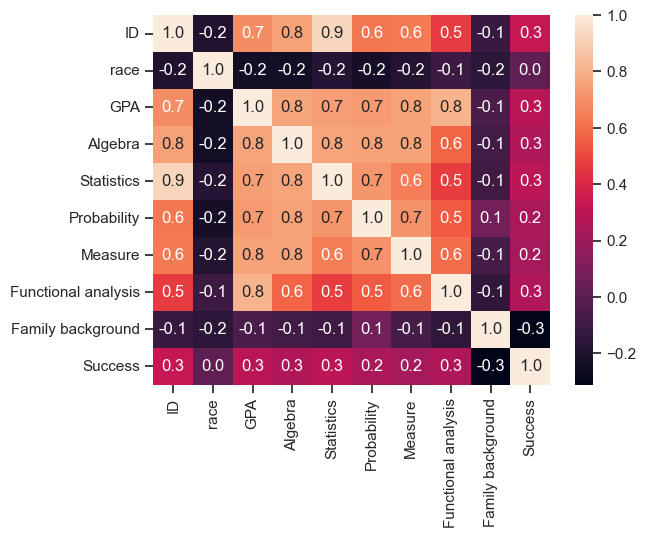

In [68]:
sns.heatmap(corr_dataset.corr(), annot=True, fmt='.1f')

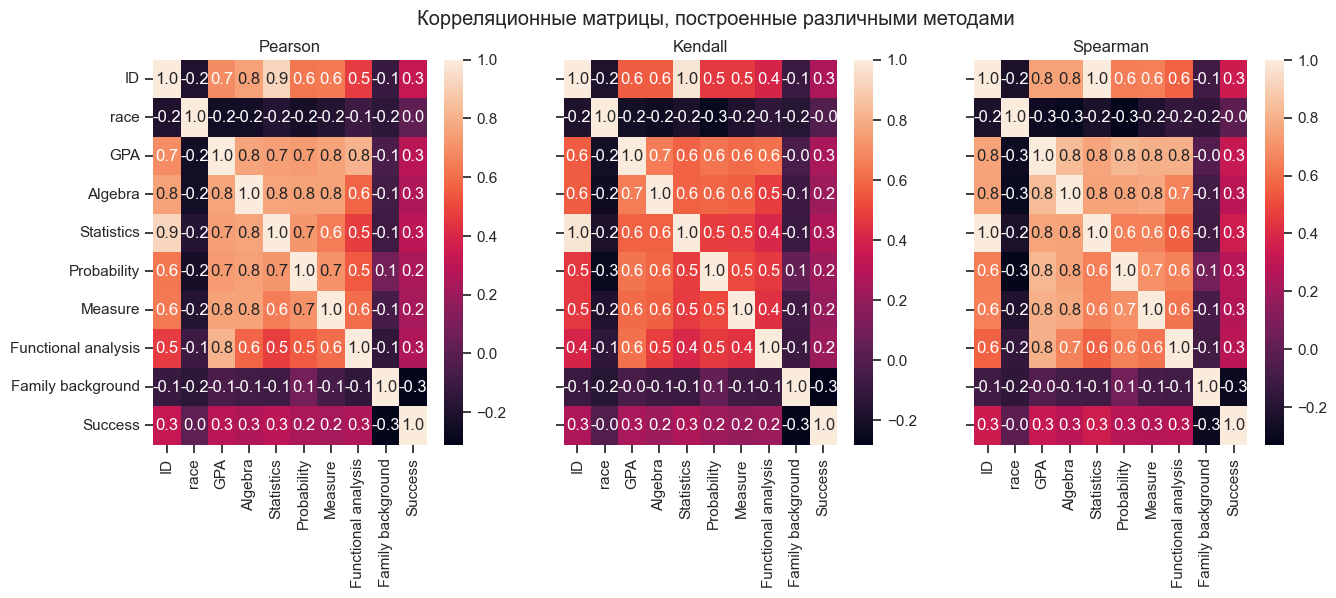

In [69]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(corr_dataset.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(corr_dataset.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(corr_dataset.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

<Axes: >

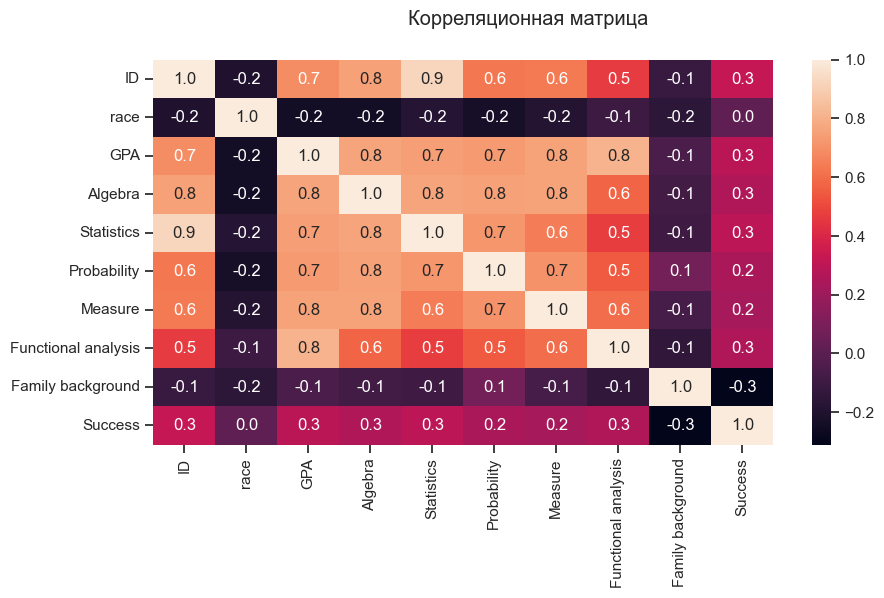

In [70]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(corr_dataset.corr(), ax=ax, annot=True, fmt='.1f')